In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [2]:
train = pandas.read_csv('CAB420_Assessment_1A_Data\Data\Q2\\testing.csv')
test = pandas.read_csv('CAB420_Assessment_1A_Data\Data\Q2\\training.csv')
train.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,67,51,68,115,69,111,136,31,67,...,-9.17,-18.27,-1.80,-6.32,-20.88,-1.63,-6.13,-22.56,-5.53,-8.11
1,s,67,28,51,99,50,97,82,26,59,...,-2.25,-20.13,-2.11,-6.35,-21.94,-1.22,-6.13,-22.20,-3.41,-6.57
2,s,63,26,50,95,49,91,81,26,57,...,-0.44,-17.64,-1.81,-4.70,-19.39,-0.65,-5.01,-20.89,-3.96,-6.85
3,d,63,42,63,97,66,108,111,28,59,...,-2.34,-20.20,-1.89,-5.47,-21.65,-0.99,-5.71,-22.19,-3.41,-6.52
4,s,46,27,50,83,51,90,76,26,56,...,1.25,-18.62,-2.17,-7.11,-21.12,-1.56,-6.35,-22.19,-4.45,-7.32


In [3]:
test.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,39,36,57,91,59,101,93,27,60,...,-2.36,-18.41,-1.88,-6.43,-21.03,-1.60,-6.18,-22.50,-5.20,-7.86
1,h,84,30,57,112,51,98,92,26,62,...,-2.26,-16.27,-1.95,-6.25,-18.79,-1.99,-6.18,-23.41,-8.87,-10.83
2,s,53,25,49,99,51,93,84,26,58,...,-1.46,-15.92,-1.79,-4.64,-17.73,-0.48,-4.69,-19.97,-4.10,-7.07
3,s,59,26,49,103,47,92,82,25,56,...,2.68,-13.77,-2.53,-6.34,-22.03,-2.34,-6.60,-27.10,-7.99,-10.81
4,d,57,49,66,103,64,106,114,28,59,...,-2.94,-21.74,-1.64,-4.62,-23.74,-0.85,-5.50,-22.83,-2.74,-5.84


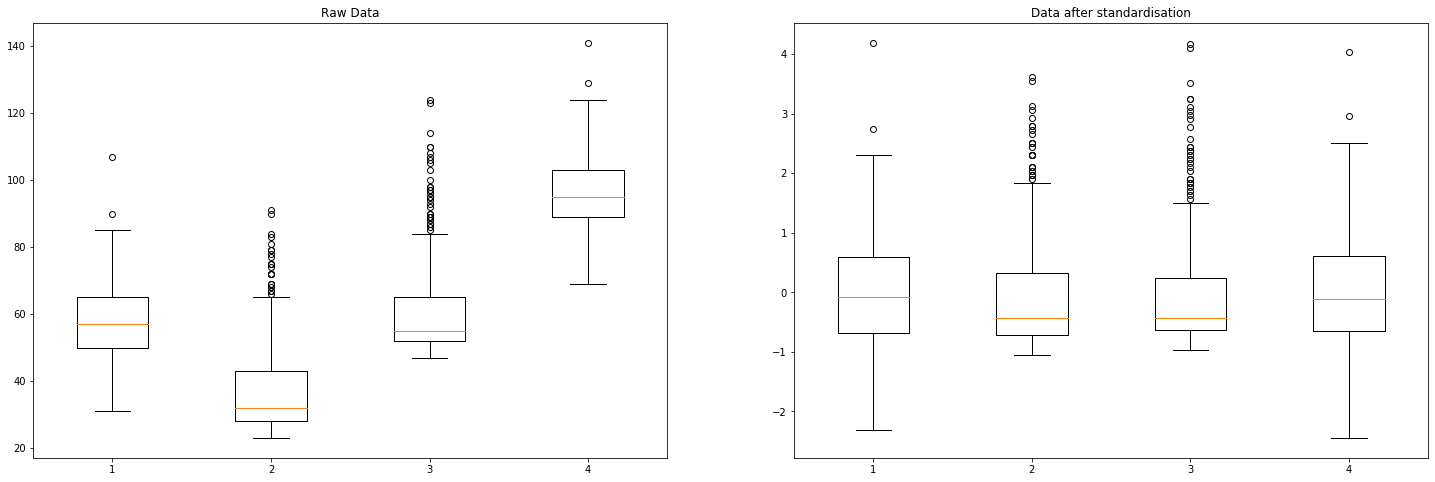

In [10]:
# get the data, we'll just grab 2 dimensions
X = train.iloc[:, 1:5].to_numpy()
train.iloc[:, 0] = train.iloc[:, 0].astype("category")
Y = train.iloc[:, 0].cat.codes.to_numpy()

# plot box plot for the data
fig = plt.figure(figsize=[25, 8])
ax = fig.add_subplot(1, 2, 1)
ax.boxplot(X)
ax.set_title('Raw Data')

# standardise data
mu = numpy.mean(X, 0)
sigma = numpy.std(X, 0)
X = (X - mu) / sigma

# box plot after standardisation
ax = fig.add_subplot(1, 2, 2)
ax.boxplot(X)
ax.set_title('Data after standardisation');

X_train = X
Y_train = Y

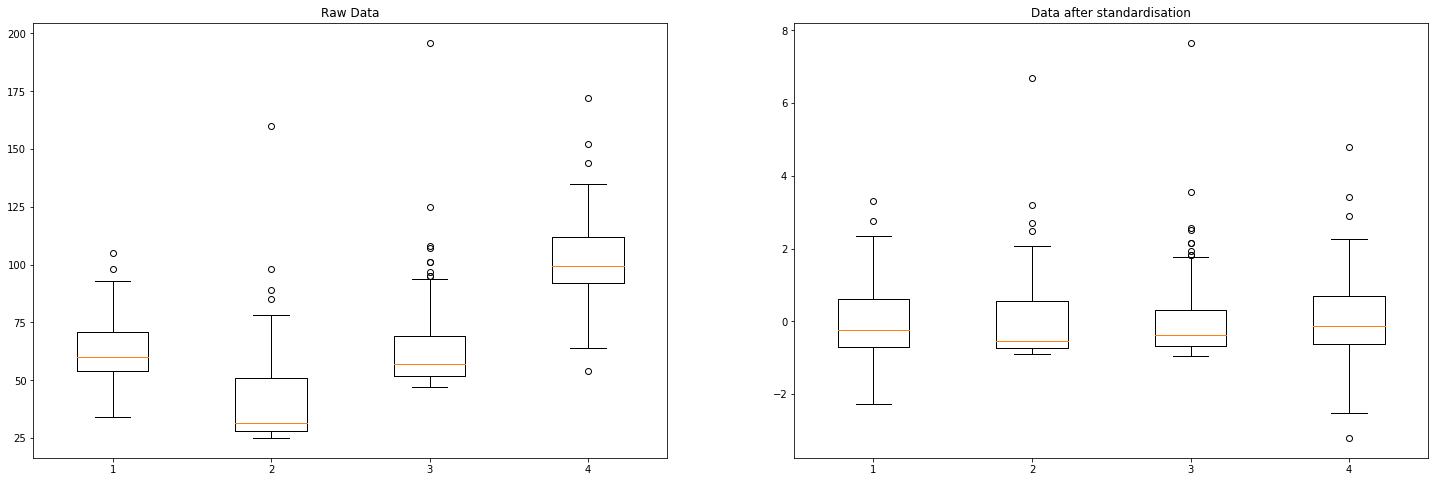

In [11]:
# get the data, we'll just grab 2 dimensions
X = test.iloc[:, 1:5].to_numpy()
test.iloc[:, 0] = test.iloc[:, 0].astype("category")
Y = test.iloc[:, 0].cat.codes.to_numpy()

# plot box plot for the data
fig = plt.figure(figsize=[25, 8])
ax = fig.add_subplot(1, 2, 1)
ax.boxplot(X)
ax.set_title('Raw Data')

# standardise data
mu = numpy.mean(X, 0)
sigma = numpy.std(X, 0)
X = (X - mu) / sigma

# box plot after standardisation
ax = fig.add_subplot(1, 2, 2)
ax.boxplot(X)
ax.set_title('Data after standardisation');

In [12]:
X_test, X_val, Y_test, Y_val = train_test_split(X, Y, test_size=0.5, random_state=1)

In [14]:
X_train.shape

(325, 4)

In [15]:
X_test.shape

(99, 4)

In [19]:
def eval_model(model, X_train, Y_train, X_test, Y_test):
    fig = plt.figure(figsize=[25, 8])
    ax = fig.add_subplot(1, 3, 1)
    conf = plot_confusion_matrix(model, X_train, Y_train, normalize='true', ax=ax)
    pred = model.predict(X_train)
    conf.ax_.set_title('Training Set Performance: ' + str(sum(pred == Y_train)/len(Y_train)));
    ax = fig.add_subplot(1, 3, 2)
    conf = plot_confusion_matrix(model, X_test, Y_test, normalize='true', ax=ax)
    pred = model.predict(X_test)
    conf.ax_.set_title('Test Set Performance: ' + str(sum(pred == Y_test)/len(Y_test)));
    
    #mins = numpy.min(X_train, 0)
    #maxs = numpy.max(X_train, 0)
    #xx, yy = numpy.meshgrid(numpy.arange(mins[0], maxs[0], 0.025),
                     #numpy.arange(mins[1], maxs[1], 0.025))

    #Z = model.predict(numpy.c_[xx.ravel(), yy.ravel()])
    #Z = Z.reshape(xx.shape)

    #ax = fig.add_subplot(1, 3, 3)
    #ax.contourf(xx, yy, Z, alpha=0.4)
    #ax.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, s=20, edgecolor='k')

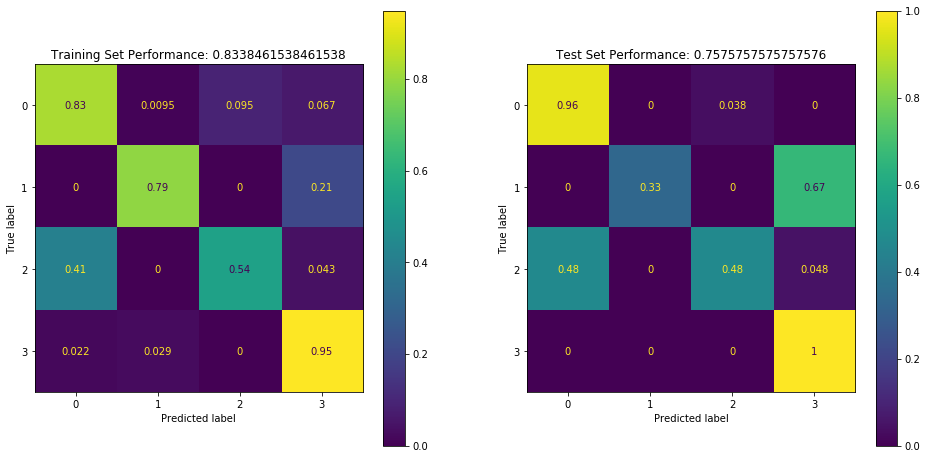

In [20]:
svm = SVC(C=1.0, kernel='linear')
svm.fit(X_train, Y_train)
eval_model(svm, X_train, Y_train, X_test, Y_test)

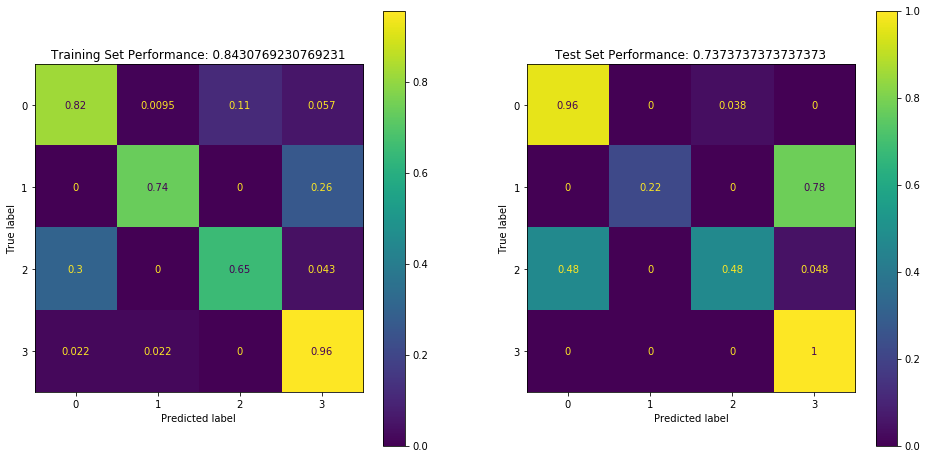

In [21]:
svm = SVC(C=1.0, kernel='rbf')
svm.fit(X_train, Y_train)
eval_model(svm, X_train, Y_train, X_test, Y_test)

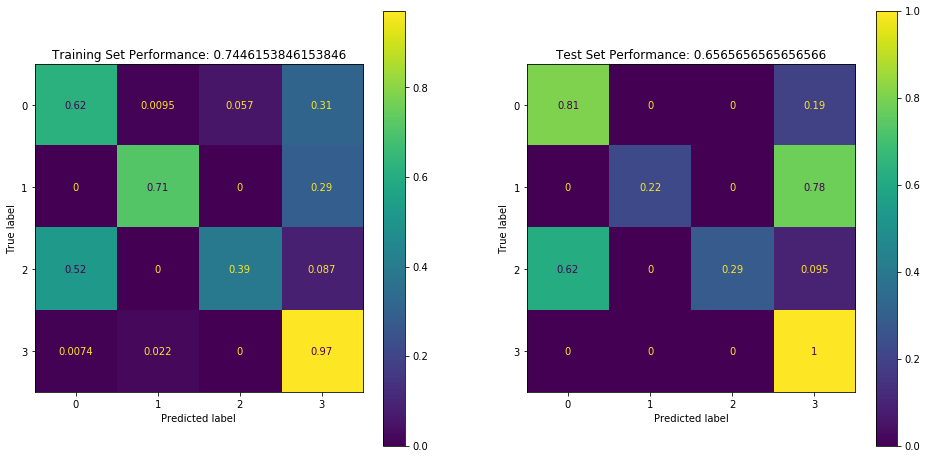

In [22]:
svm = SVC(C=1.0, kernel='poly')
svm.fit(X_train, Y_train)
eval_model(svm, X_train, Y_train, X_test, Y_test)

In [23]:
param_grid = [
  {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
  {'C': [0.1, 1, 10, 100, 1000], 'degree': [3, 4, 5, 6], 'kernel': ['poly']},
 ]
svm = SVC()
grid_search = GridSearchCV(svm, param_grid)
grid_search.fit(X_train, Y_train)
grid_search.cv_results_

{'mean_fit_time': array([0.00159554, 0.00179772, 0.00359712, 0.0148067 , 0.17623763,
        0.00359464, 0.00320091, 0.00399394, 0.00299892, 0.00220299,
        0.00299964, 0.00300112, 0.00339952, 0.00240068, 0.00220776,
        0.00258479, 0.00339074, 0.00379848, 0.00239677, 0.00219946,
        0.00259442, 0.01420736, 0.00541844, 0.00259004, 0.00221453,
        0.00340176, 0.00239987, 0.00299783, 0.0043993 , 0.00319877,
        0.00520267, 0.00819936, 0.02560897, 0.0054029 , 0.01920753,
        0.0213882 , 0.03739643, 0.04839845, 0.07179632, 0.11819758,
        0.11959734, 0.22218571, 0.44139924, 0.54612617, 1.08126907]),
 'std_fit_time': array([8.09230694e-04, 3.98176427e-04, 4.88519345e-04, 4.30096385e-03,
        8.13544388e-02, 4.88824258e-04, 4.00502214e-04, 8.98705321e-04,
        5.97399130e-06, 9.83561766e-04, 6.31882980e-04, 6.32337936e-04,
        4.88792967e-04, 4.91403686e-04, 3.78844736e-04, 4.75814978e-04,
        4.90110234e-04, 4.00431879e-04, 4.88074928e-04, 3.9861220

{'C': 1, 'kernel': 'linear'}


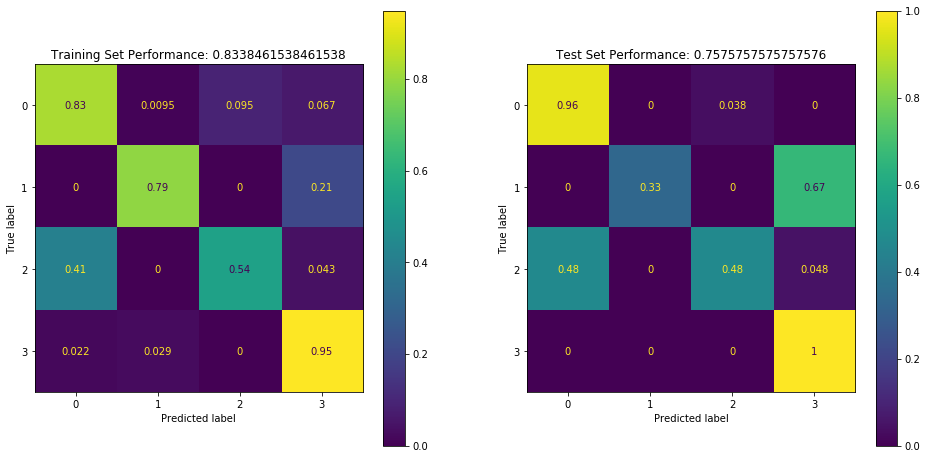

In [24]:
best_system = numpy.argmin(grid_search.cv_results_['rank_test_score'])
params = grid_search.cv_results_['params'][best_system]
print(params)
svm = SVC().set_params(**params)
svm.fit(X_train, Y_train)
eval_model(svm, X_train, Y_train, X_test, Y_test)

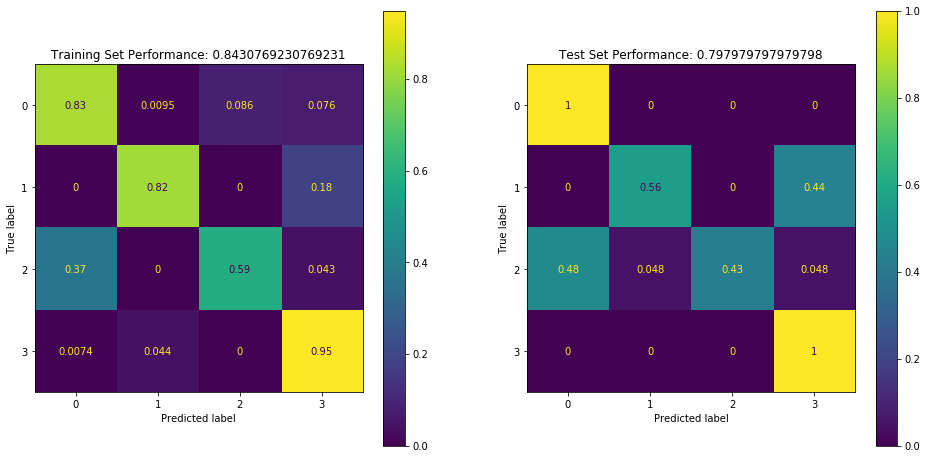

In [25]:
cknn = KNeighborsClassifier(n_neighbors=10, weights='uniform')
cknn.fit(X_train, Y_train)
eval_model(cknn, X_train, Y_train, X_test, Y_test)

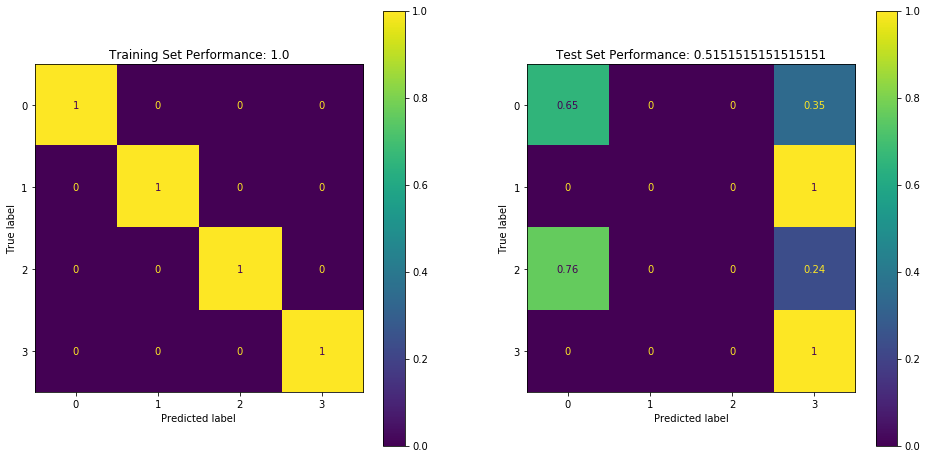

In [28]:
cknn = KNeighborsClassifier(n_neighbors=325, weights='distance')
cknn.fit(X_train, Y_train)
eval_model(cknn, X_train, Y_train, X_test, Y_test)

In [29]:
cknn = KNeighborsClassifier()
params = {'n_neighbors' : list(range(1,21)), 'weights' : ['uniform', 'distance']}
rand_search = RandomizedSearchCV(cknn, params, n_iter=20)
rand_search.fit(X_train, Y_train)
print(rand_search.cv_results_)

{'mean_fit_time': array([0.00111551, 0.00040345, 0.00040989, 0.00079722, 0.00059981,
       0.00060048, 0.00060105, 0.00020037, 0.00080142, 0.00060725,
       0.00059314, 0.00020003, 0.00079985, 0.0007936 , 0.00080237,
       0.00079136, 0.0003993 , 0.00098891, 0.00059304, 0.00039392]), 'std_fit_time': array([2.29864119e-04, 4.94153053e-04, 5.02117529e-04, 3.98697500e-04,
       4.89746081e-04, 4.90291043e-04, 4.90758663e-04, 4.00733948e-04,
       4.00754175e-04, 4.96010128e-04, 4.85083148e-04, 4.00066376e-04,
       3.99925414e-04, 3.96984177e-04, 4.01660592e-04, 3.95960575e-04,
       4.89045208e-04, 2.12502521e-05, 4.84349385e-04, 4.82501019e-04]), 'mean_score_time': array([0.00499973, 0.00159588, 0.00298424, 0.00379095, 0.00300016,
       0.00299845, 0.00299821, 0.00299964, 0.0031992 , 0.00260763,
       0.00160022, 0.00441909, 0.0010005 , 0.00299959, 0.00118966,
       0.00360107, 0.00142708, 0.00401268, 0.0033987 , 0.00121226]), 'std_score_time': array([9.04385508e-04, 4.8861060

{'weights': 'distance', 'n_neighbors': 11}


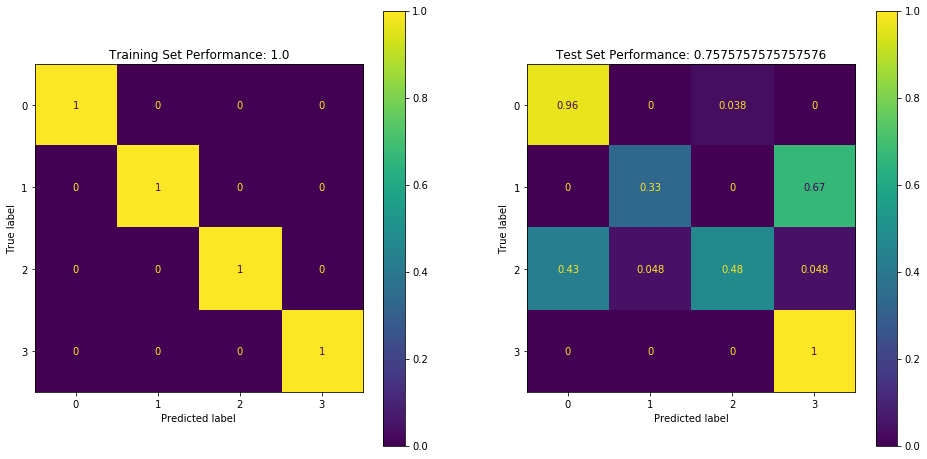

In [30]:
best_system = numpy.argmin(rand_search.cv_results_['rank_test_score'])
params = rand_search.cv_results_['params'][best_system]
print(params)
cknn = KNeighborsClassifier().set_params(**params)
cknn.fit(X_train, Y_train)
eval_model(cknn, X_train, Y_train, X_test, Y_test)

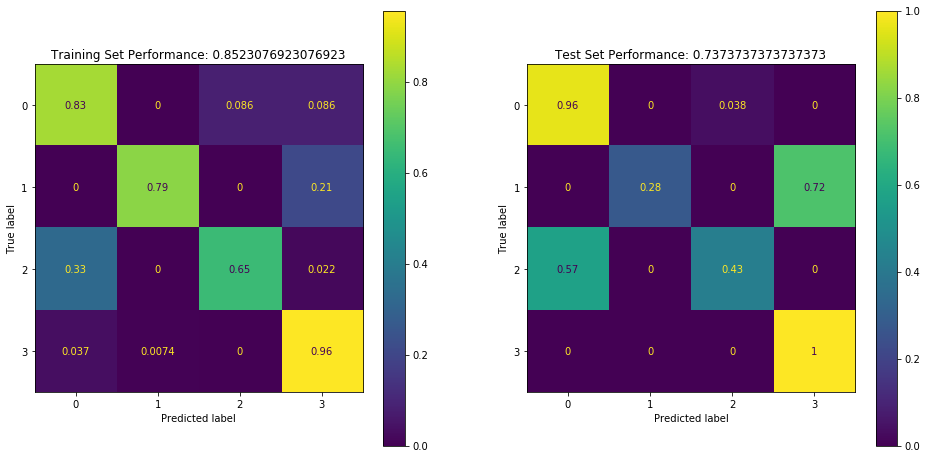

In [31]:
rf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0)
rf.fit(X_train, Y_train)
eval_model(rf, X_train, Y_train, X_test, Y_test)

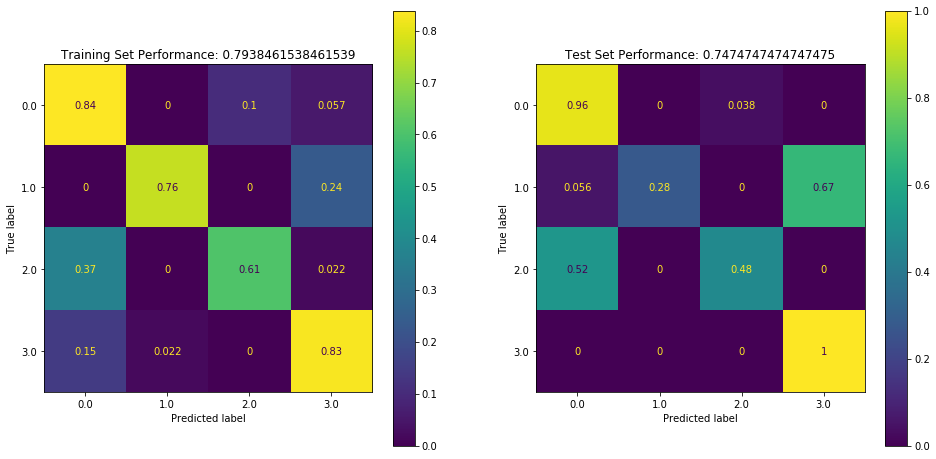

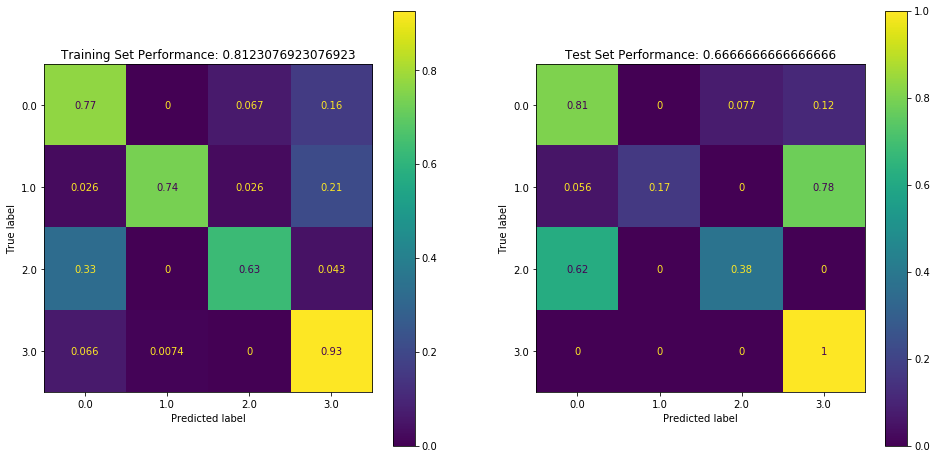

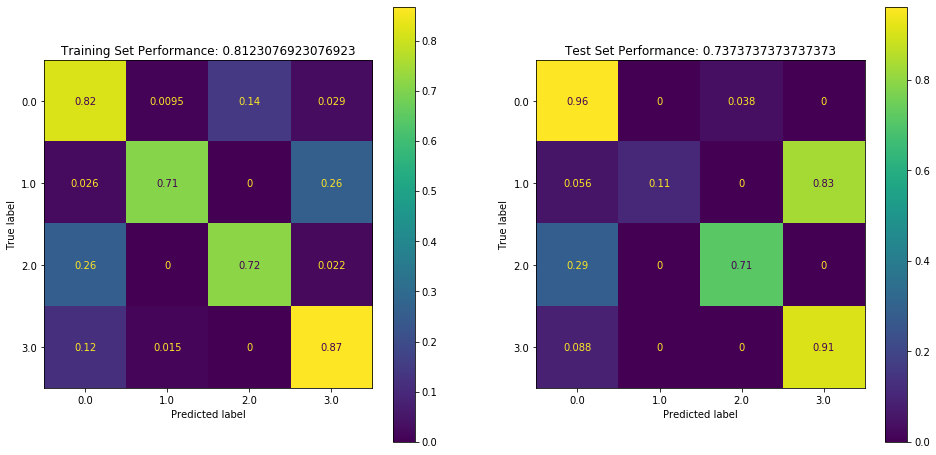

In [32]:
eval_model(rf.estimators_[0], X_train, Y_train, X_test, Y_test)
eval_model(rf.estimators_[4], X_train, Y_train, X_test, Y_test)
eval_model(rf.estimators_[42], X_train, Y_train, X_test, Y_test)

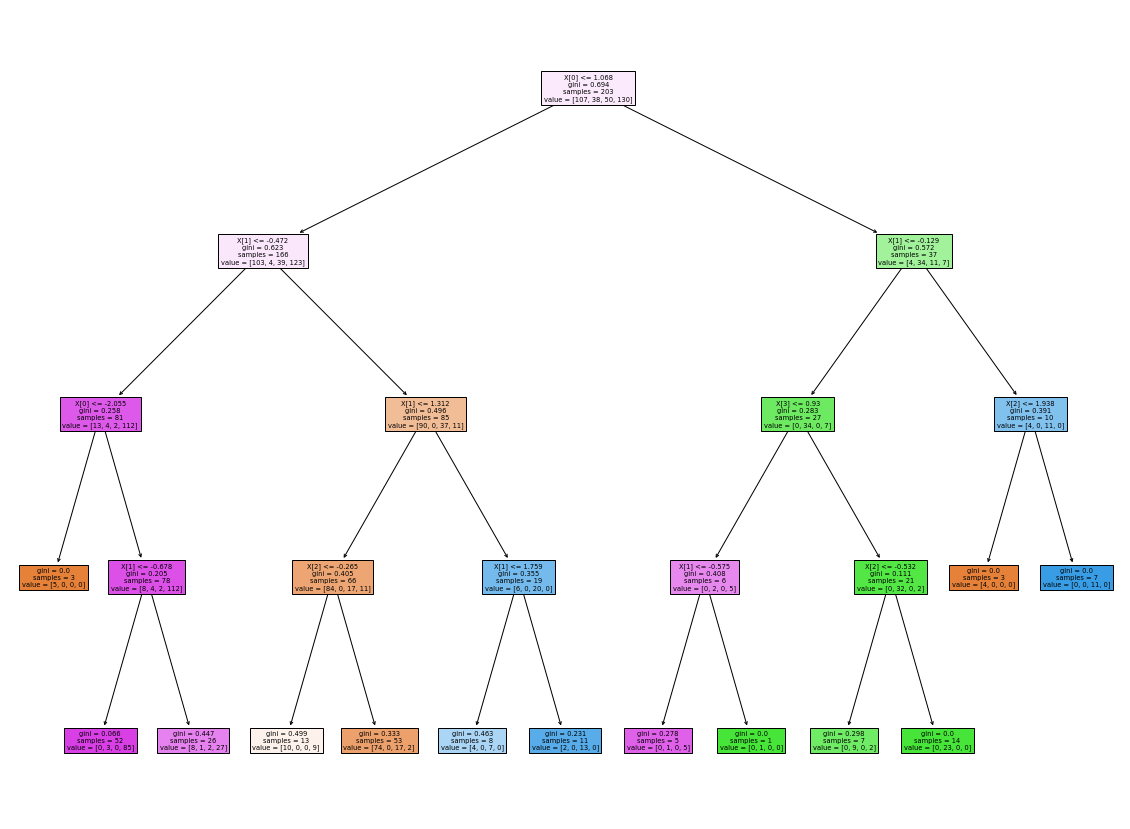

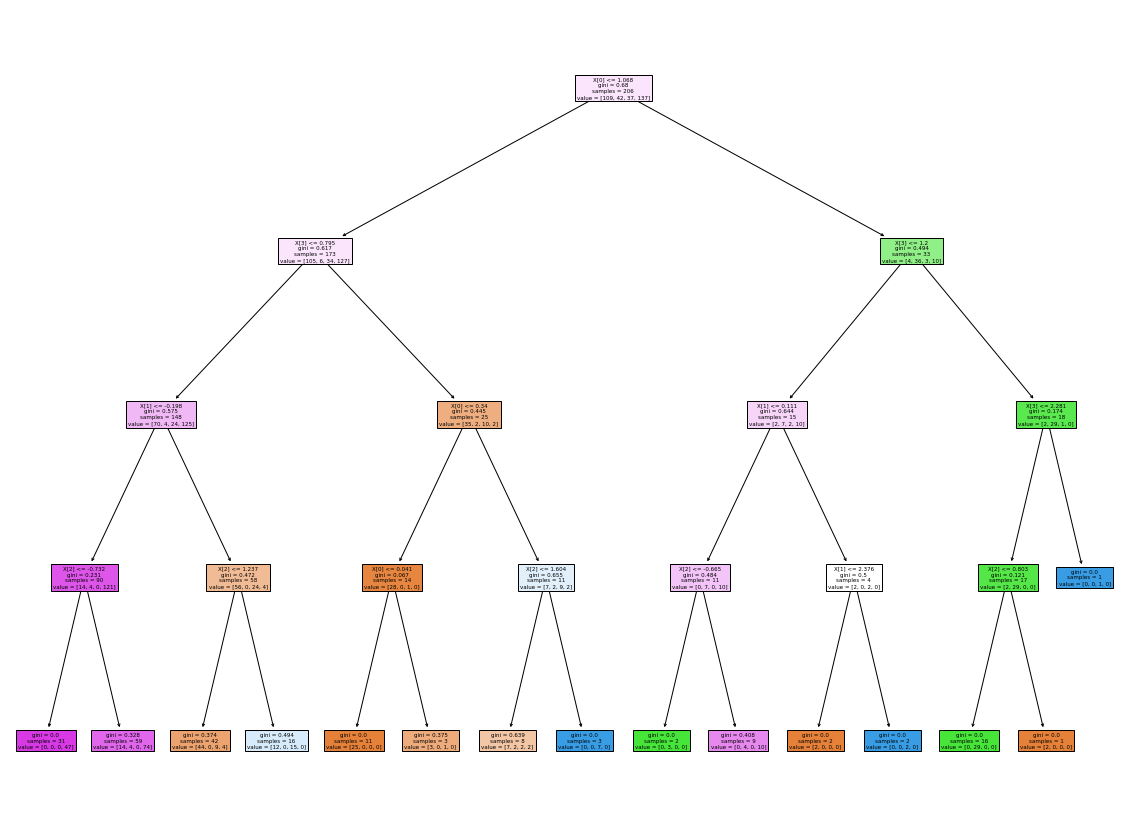

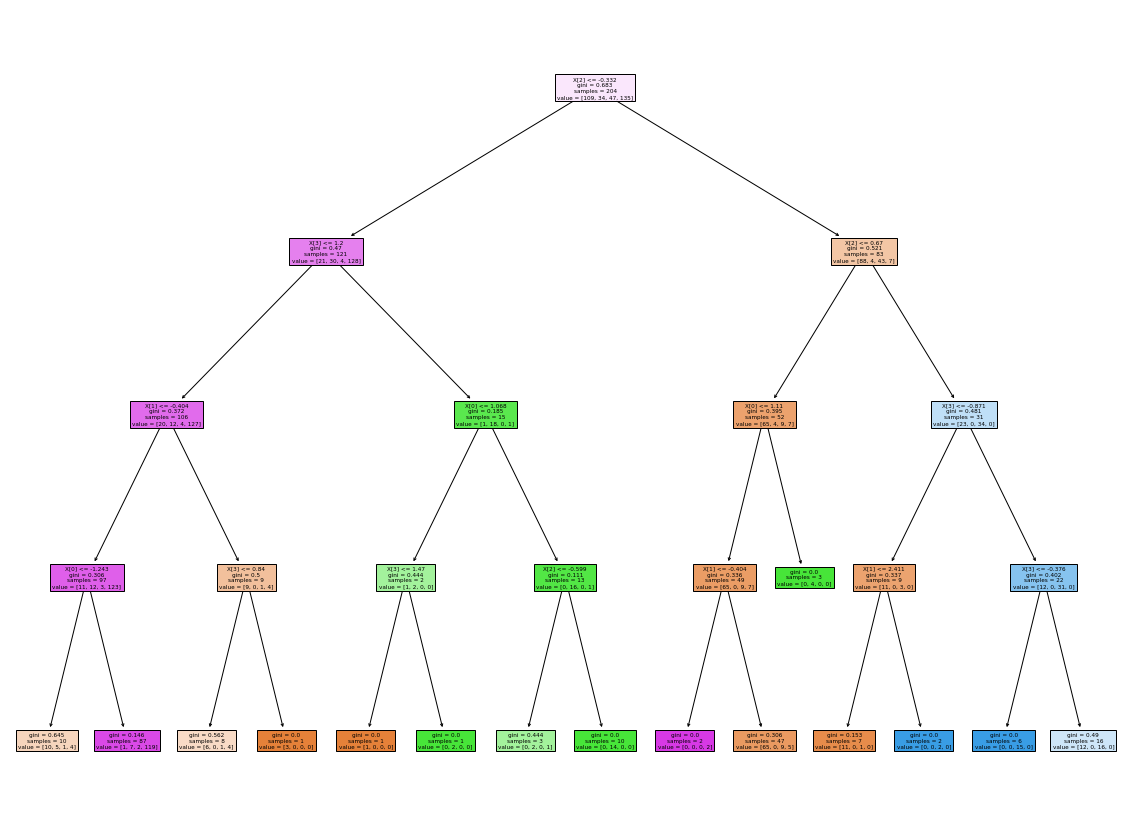

In [33]:
fig = plt.figure(figsize=(20,15))
_ = tree.plot_tree(rf.estimators_[0], filled=True) 
fig = plt.figure(figsize=(20,15))
_ = tree.plot_tree(rf.estimators_[4], filled=True) 
fig = plt.figure(figsize=(20,15))
_ = tree.plot_tree(rf.estimators_[42], filled=True) 